In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\Naweed Ibrahimi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [4]:
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))


Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4481 - loss: 1.7702 - val_accuracy: 0.8972 - val_loss: 0.5216
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9178 - loss: 0.4428 - val_accuracy: 0.9500 - val_loss: 0.2696
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9537 - loss: 0.2092 - val_accuracy: 0.9556 - val_loss: 0.1910
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.1360 - val_accuracy: 0.9639 - val_loss: 0.1508
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9897 - loss: 0.0874 - val_accuracy: 0.9694 - val_loss: 0.1274
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9925 - loss: 0.0745 - val_accuracy: 0.9722 - val_loss: 0.1138
Epoch 7/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9980 - loss: 0.0507 - val_accuracy: 0.9750 - val_loss: 0.1047
Epoch 8/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9951 - loss: 0.0472 - val_accuracy: 0.

In [5]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 98.06%


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



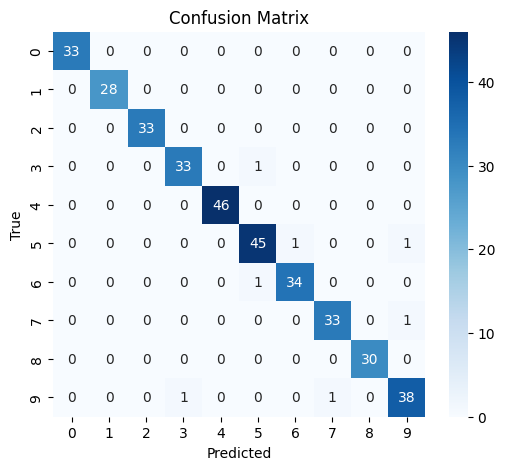

In [6]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


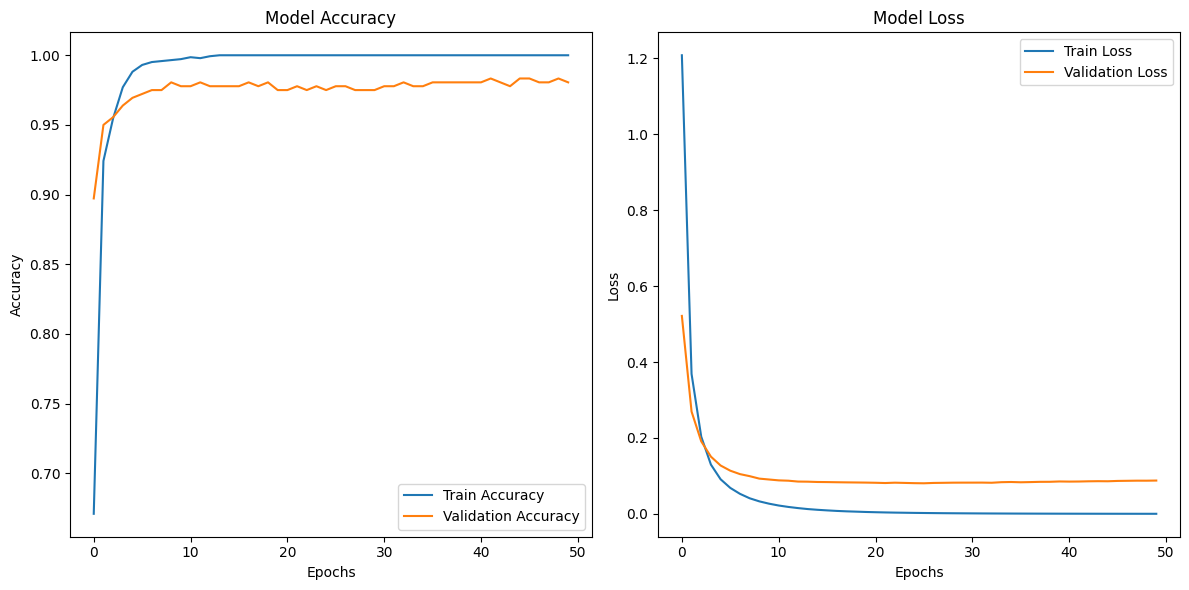

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


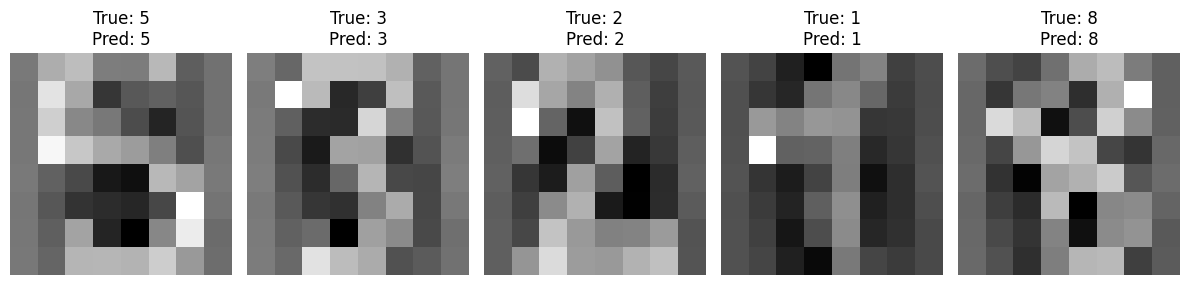

In [8]:
# Randomly select 5 test samples to visualize
num_samples = 5
indices = np.random.choice(X_test.shape[0], num_samples, replace=False)

fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))

for i, idx in enumerate(indices):
    # Reshape the flattened 8x8 image
    image = X_test[idx].reshape(8, 8)
    true_label = y_test[idx]
    predicted_label = y_pred[idx]

    # Plot the image and display its prediction
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"True: {true_label}\nPred: {predicted_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


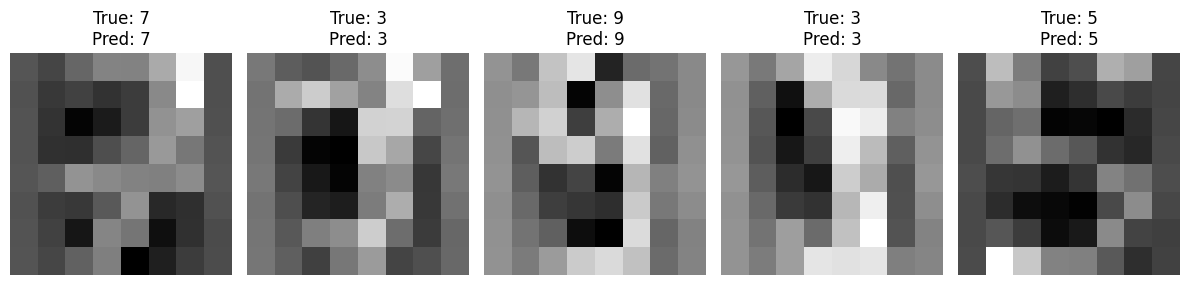

In [9]:
# Visualize Some Test Digits and Their Predictions
num_samples = 5  # Number of test images to visualize
indices = np.random.choice(X_test.shape[0], num_samples, replace=False)

# Create subplots to show the images
fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))

for i, idx in enumerate(indices):
    image = X_test[idx].reshape(8, 8)  # Reshape the flattened image
    true_label = y_test[idx]  # True label of the image
    predicted_label = y_pred[idx]  # Predicted label of the image

    # Display the image
    axes[i].imshow(image, cmap='gray')  # Show the image in grayscale
    axes[i].set_title(f"True: {true_label}\nPred: {predicted_label}", fontsize=12)
    axes[i].axis('off')  # Hide axis

plt.tight_layout()  # Adjust spacing between images
plt.show()
